In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

### 1. Data Cleaning

In [3]:
df_raw = pd.read_csv('../two_reactions_022624.csv')
df_raw.tail()

,Unnamed: 0,Temperature,A1,Ea1,A2,Ea2,A3,Ea3,A4,Ea4,cSM_0s,cSM_0.1s,cSM_1s,cSM_20s,cSM_40s,cSM_60s,cSM_120s,cSM_180s,cSM_240s,cSM_300s,cSM_360s,cSM_480s,cSM_600s,cSM_720s,cSM_840s,cSM_960s,cSM_1080s,cSM_1200s,cSM_1500s,cSM_1800s,cSM_2400s,cSM_3000s,cSM_3600s,cSM_4500s,cSM_5400s,cSM_6300s,cSM_7200s,cSM_9000s,cSM_10800s,cSM_14400s,cR_0s,cR_0.1s,cR_1s,cR_20s,cR_40s,cR_60s,cR_120s,cR_180s,cR_240s,cR_300s,cR_360s,cR_480s,cR_600s,cR_720s,cR_840s,cR_960s,cR_1080s,cR_1200s,cR_1500s,cR_1800s,cR_2400s,cR_3000s,cR_3600s,cR_4500s,cR_5400s,cR_6300s,cR_7200s,cR_9000s,cR_10800s,cR_14400s,cB_0s,cB_0.1s,cB_1s,cB_20s,cB_40s,cB_60s,cB_120s,cB_180s,cB_240s,cB_300s,cB_360s,cB_480s,cB_600s,cB_720s,cB_840s,cB_960s,cB_1080s,cB_1200s,cB_1500s,cB_1800s,cB_2400s,cB_3000s,cB_3600s,cB_4500s,cB_5400s,cB_6300s,cB_7200s,cB_9000s,cB_10800s,cB_14400s,cC_0s,cC_0.1s,cC_1s,cC_20s,cC_40s,cC_60s,cC_120s,cC_180s,cC_240s,cC_300s,cC_360s,cC_480s,cC_600s,cC_720s,cC_840s,cC_960s,cC_1080s,cC_1200s,cC_1500s,cC_1800s,cC_2400s,cC_3000s,cC_3600s,cC_4500s,cC_5400s,cC_6300s,cC_7200s,cC_9000s,cC_10800s,cC_14400s,cP_0s,cP_0.1s,cP_1s,cP_20s,cP_40s,cP_60s,cP_120s,cP_180s,cP_240s,cP_300s,cP_360s,cP_480s,cP_600s,cP_720s,cP_840s,cP_960s,cP_1080s,cP_1200s,cP_1500s,cP_1800s,cP_2400s,cP_3000s,cP_3600s,cP_4500s,cP_5400s,cP_6300s,cP_7200s,cP_9000s,cP_10800s,cP_14400s,cIMP1_0s,cIMP1_0.1s,cIMP1_1s,cIMP1_20s,cIMP1_40s,cIMP1_60s,cIMP1_120s,cIMP1_180s,cIMP1_240s,cIMP1_300s,cIMP1_360s,cIMP1_480s,cIMP1_600s,cIMP1_720s,cIMP1_840s,cIMP1_960s,cIMP1_1080s,cIMP1_1200s,cIMP1_1500s,cIMP1_1800s,cIMP1_2400s,cIMP1_3000s,cIMP1_3600s,cIMP1_4500s,cIMP1_5400s,cIMP1_6300s,cIMP1_7200s,cIMP1_9000s,cIMP1_10800s,cIMP1_14400s,cIMP2_0s,cIMP2_0.1s,cIMP2_1s,cIMP2_20s,cIMP2_40s,cIMP2_60s,cIMP2_120s,cIMP2_180s,cIMP2_240s,cIMP2_300s,cIMP2_360s,cIMP2_480s,cIMP2_600s,cIMP2_720s,cIMP2_840s,cIMP2_960s,cIMP2_1080s,cIMP2_1200s,cIMP2_1500s,cIMP2_1800s,cIMP2_2400s,cIMP2_3000s,cIMP2_3600s,cIMP2_4500s,cIMP2_5400s,cIMP2_6300s,cIMP2_7200s,cIMP2_9000s,cIMP2_10800s,cIMP2_14400s,cINT1_0s,cINT1_0.1s,cINT1_1s,cINT1_20s,cINT1_40s,cINT1_60s,cINT1_120s,cINT1_180s,cINT1_240s,cINT1_300s,cINT1_360s,cINT1_480s,cINT1_600s,cINT1_720s,cINT1_840s,cINT1_960s,cINT1_1080s,cINT1_1200s,cINT1_1500s,cINT1_1800s,cINT1_2400s,cINT1_3000s,cINT1_3600s,cINT1_4500s,cINT1_5400s,cINT1_6300s,cINT1_7200s,cINT1_9000s,cINT1_10800s,cINT1_14400s,Fast_rxn1,Medium_rxn1,Slow_rxn1,Fast_rxn2,Medium_rxn2,Slow_rxn2,Reaction_order,Mechanism
1933581,1933581,273,261.472219,194,0.044413,141,0,0,0,0,0.3,0.294614,0.264231,0.182232,0.166794,0.158981,0.147680,0.142226,0.138849,0.136498,0.134742,0.132256,0.130561,0.129315,0.128356,0.127591,0.126961,0.126439,0.125435,0.124712,0.123742,0.123113,0.122668,0.122203,0.121878,0.121639,0.121454,0.121187,0.121005,0.120770,0.45,0.444614,0.414231,0.332232,0.316794,0.308981,0.297680,0.292226,0.288849,0.286498,0.284742,0.282256,0.280561,0.279315,0.278356,0.277591,0.276961,0.276439,0.275435,0.274712,0.273742,0.273113,0.272668,0.272203,0.271878,0.271639,0.271454,0.271187,0.271005,0.270770,0.9,0.897307,0.882116,0.841116,0.833397,0.829490,0.823840,0.821113,0.819425,0.818249,0.817371,0.816128,0.815280,0.814658,0.814178,0.813796,0.813481,0.813220,0.812717,0.812356,0.811871,0.811556,0.811334,0.811101,0.810939,0.810820,0.810727,0.810594,0.810503,0.810385,0.09,0.087307,0.072116,0.031116,0.023397,0.019490,0.013840,0.011113,0.009425,0.008249,0.007371,0.006128,0.005280,0.004658,0.004178,0.003796,0.003481,0.003220,0.002717,0.002356,0.001871,0.001556,0.001334,0.001101,0.000939,0.000820,0.000727,0.000594,0.000503,0.000385,0.15,0.150001,0.150033,0.151533,0.152891,0.154049,0.156821,0.158977,0.160764,0.162300,0.163651,0.165951,0.167870,0.169517,0.170960,0.172244,0.173401,0.174452,0.176724,0.178618,0.181647,0.184013,0.185946,0.188297,0.190198,0.191782,0.193140,0.195365,0.197137,0.199840,0.0,2.693084e-03,0.017884,0.058884,0.066603,0.070510,0.076160,0.078887,0.080575,0.081751,0.082629,0.083872,0.084720,0.085342,0.085822,0.086204,0.086519,0.086780,0.087283,0.087644,0.08

In [4]:
df_raw.shape

(1933586, 258)

In [5]:
y_raw_df = df_raw.iloc[:, -1:]
y_raw_df.tail()

,Mechanism
1933581,"(93, 254)"
1933582,"(93, 254)"
1933583,"(93, 254)"
1933584,"(93, 254)"
1933585,"(93, 254)"


In [6]:
unique_values = y_raw_df['Mechanism'].unique()
print(len(unique_values))

456


In [7]:
df = df_raw.copy()
df.shape

(1933586, 258)

In [8]:
conc_list = [col for col in df.columns if col.endswith('s')]
# conc_list

In [9]:
x_df_raw = df[conc_list]
x_df_raw.head()

,cSM_0s,cSM_0.1s,cSM_1s,cSM_20s,cSM_40s,cSM_60s,cSM_120s,cSM_180s,cSM_240s,cSM_300s,cSM_360s,cSM_480s,cSM_600s,cSM_720s,cSM_840s,cSM_960s,cSM_1080s,cSM_1200s,cSM_1500s,cSM_1800s,cSM_2400s,cSM_3000s,cSM_3600s,cSM_4500s,cSM_5400s,cSM_6300s,cSM_7200s,cSM_9000s,cSM_10800s,cSM_14400s,cR_0s,cR_0.1s,cR_1s,cR_20s,cR_40s,cR_60s,cR_120s,cR_180s,cR_240s,cR_300s,cR_360s,cR_480s,cR_600s,cR_720s,cR_840s,cR_960s,cR_1080s,cR_1200s,cR_1500s,cR_1800s,cR_2400s,cR_3000s,cR_3600s,cR_4500s,cR_5400s,cR_6300s,cR_7200s,cR_9000s,cR_10800s,cR_14400s,cB_0s,cB_0.1s,cB_1s,cB_20s,cB_40s,cB_60s,cB_120s,cB_180s,cB_240s,cB_300s,cB_360s,cB_480s,cB_600s,cB_720s,cB_840s,cB_960s,cB_1080s,cB_1200s,cB_1500s,cB_1800s,cB_2400s,cB_3000s,cB_3600s,cB_4500s,cB_5400s,cB_6300s,cB_7200s,cB_9000s,cB_10800s,cB_14400s,cC_0s,cC_0.1s,cC_1s,cC_20s,cC_40s,cC_60s,cC_120s,cC_180s,cC_240s,cC_300s,cC_360s,cC_480s,cC_600s,cC_720s,cC_840s,cC_960s,cC_1080s,cC_1200s,cC_1500s,cC_1800s,cC_2400s,cC_3000s,cC_3600s,cC_4500s,cC_5400s,cC_6300s,cC_7200s,cC_9000s,cC_10800s,cC_14400s,cP_0s,cP_0.1s,cP_1s,cP_20s,cP_40s,cP_60s,cP_120s,cP_180s,cP_240s,cP_300s,cP_360s,cP_480s,cP_600s,cP_720s,cP_840s,cP_960s,cP_1080s,cP_1200s,cP_1500s,cP_1800s,cP_2400s,cP_3000s,cP_3600s,cP_4500s,cP_5400s,cP_6300s,cP_7200s,cP_9000s,cP_10800s,cP_14400s,cIMP1_0s,cIMP1_0.1s,cIMP1_1s,cIMP1_20s,cIMP1_40s,cIMP1_60s,cIMP1_120s,cIMP1_180s,cIMP1_240s,cIMP1_300s,cIMP1_360s,cIMP1_480s,cIMP1_600s,cIMP1_720s,cIMP1_840s,cIMP1_960s,cIMP1_1080s,cIMP1_1200s,cIMP1_1500s,cIMP1_1800s,cIMP1_2400s,cIMP1_3000s,cIMP1_3600s,cIMP1_4500s,cIMP1_5400s,cIMP1_6300s,cIMP1_7200s,cIMP1_9000s,cIMP1_10800s,cIMP1_14400s,cIMP2_0s,cIMP2_0.1s,cIMP2_1s,cIMP2_20s,cIMP2_40s,cIMP2_60s,cIMP2_120s,cIMP2_180s,cIMP2_240s,cIMP2_300s,cIMP2_360s,cIMP2_480s,cIMP2_600s,cIMP2_720s,cIMP2_840s,cIMP2_960s,cIMP2_1080s,cIMP2_1200s,cIMP2_1500s,cIMP2_1800s,cIMP2_2400s,cIMP2_3000s,cIMP2_3600s,cIMP2_4500s,cIMP2_5400s,cIMP2_6300s,cIMP2_7200s,cIMP2_9000s,cIMP2_10800s,cIMP2_14400s,cINT1_0s,cINT1_0.1s,cINT1_1s,cINT1_20s,cINT1_40s,cINT1_60s,cINT1_120s,cINT1_180s,cINT1_240s,cINT1_300s,cINT1_360s,cINT1_480s,cINT1_600s,cINT1_720s,cINT1_840s,cINT1_960s,cINT1_1080s,cINT1_1200s,cINT1_1500s,cINT1_1800s,cINT1_2400s,cINT1_3000s,cINT1_3600s,cINT1_4500s,cINT1_5400s,cINT1_6300s,cINT1_7200s,cINT1_9000s,cINT1_10800s,cINT1_14400s
0,0.3,0.299999,0.299992,0.299837,0.299675,0.299514,0.299035,0.298564,0.298101,0.297645,0.297197,0.296321,0.295471,0.294644,0.293842,0.293062,0.292304,0.291567,0.289810,0.288156,0.285124,0.282405,0.279936,0.276626,0.273681,0.271057,0.268655,0.264483,0.260906,0.255077,0.45,0.449999,0.449992,0.449837,0.449675,0.449513,0.449035,0.448563,0.448099,0.447641,0.447189,0.446304,0.445441,0.444591,0.443759,0.442944,0.442143,0.441357,0.439447,0.437585,0.434001,0.430589,0.427321,0.422705,0.418420,0.414446,0.410773,0.404216,0.398530,0.389175,0.9,0.900000,0.899996,0.899918,0.899837,0.899757,0.899517,0.899282,0.899049,0.898820,0.898595,0.898152,0.897720,0.897296,0.896880,0.896472,0.896072,0.895679,0.894724,0.893792,0.892001,0.890294,0.888661,0.886353,0.884210,0.882223,0.880387,0.877108,0.874265,0.869588,0.09,0.089999,0.089992,0.089837,0.089675,0.089514,0.089035,0.088565,0.088102,0.087648,0.087201,0.086329,0.085486,0.084671,0.083883,0.083121,0.082384,0.081672,0.079992,0.078441,0.075686,0.073313,0.071243,0.068586,0.066312,0.064363,0.062596,0.059617,0.057093,0.053027,0.0,4.088057e-07,4.087539e-06,0.000082,0.000163,0.000243,0.000482,0.000718,0.000949,0.001177,0.001402,0.001840,0.002264,0.002678,0.003079,0.003469,0.003848,0.004217,0.005095,0.005922,0.007438,0.008797,0.010032,0.011687,0.013159,0.014471,0.015673,0.017758,0.019547,0.022462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8.070481e-17,8.090876e-14,6.970219e-10,5.645935e-09,1.811532e-08,1.627378e-07,5.814287e-07,0.000001,0.000002,0.000004,0.000008,0.000015,0.000027,0.000041,0.000059,0.000080,0.000105,0.000182,0.000285,0.000562,0.000908,0.001307,0.001960,0.002631,0.00

In [10]:
x_df_raw.shape

(1933586, 240)

In [11]:
# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Transpose the DataFrame so that rows become columns for scaling
x_df_transposed = x_df_raw.T

# Scale the entire transposed DataFrame
scaled_data = scaler.fit_transform(x_df_transposed)

# Transpose the scaled data back to the original orientation
x = pd.DataFrame(scaled_data.T, columns=x_df_raw.columns, index=x_df_raw.index)

In [12]:
x.head()

,cSM_0s,cSM_0.1s,cSM_1s,cSM_20s,cSM_40s,cSM_60s,cSM_120s,cSM_180s,cSM_240s,cSM_300s,cSM_360s,cSM_480s,cSM_600s,cSM_720s,cSM_840s,cSM_960s,cSM_1080s,cSM_1200s,cSM_1500s,cSM_1800s,cSM_2400s,cSM_3000s,cSM_3600s,cSM_4500s,cSM_5400s,cSM_6300s,cSM_7200s,cSM_9000s,cSM_10800s,cSM_14400s,cR_0s,cR_0.1s,cR_1s,cR_20s,cR_40s,cR_60s,cR_120s,cR_180s,cR_240s,cR_300s,cR_360s,cR_480s,cR_600s,cR_720s,cR_840s,cR_960s,cR_1080s,cR_1200s,cR_1500s,cR_1800s,cR_2400s,cR_3000s,cR_3600s,cR_4500s,cR_5400s,cR_6300s,cR_7200s,cR_9000s,cR_10800s,cR_14400s,cB_0s,cB_0.1s,cB_1s,cB_20s,cB_40s,cB_60s,cB_120s,cB_180s,cB_240s,cB_300s,cB_360s,cB_480s,cB_600s,cB_720s,cB_840s,cB_960s,cB_1080s,cB_1200s,cB_1500s,cB_1800s,cB_2400s,cB_3000s,cB_3600s,cB_4500s,cB_5400s,cB_6300s,cB_7200s,cB_9000s,cB_10800s,cB_14400s,cC_0s,cC_0.1s,cC_1s,cC_20s,cC_40s,cC_60s,cC_120s,cC_180s,cC_240s,cC_300s,cC_360s,cC_480s,cC_600s,cC_720s,cC_840s,cC_960s,cC_1080s,cC_1200s,cC_1500s,cC_1800s,cC_2400s,cC_3000s,cC_3600s,cC_4500s,cC_5400s,cC_6300s,cC_7200s,cC_9000s,cC_10800s,cC_14400s,cP_0s,cP_0.1s,cP_1s,cP_20s,cP_40s,cP_60s,cP_120s,cP_180s,cP_240s,cP_300s,cP_360s,cP_480s,cP_600s,cP_720s,cP_840s,cP_960s,cP_1080s,cP_1200s,cP_1500s,cP_1800s,cP_2400s,cP_3000s,cP_3600s,cP_4500s,cP_5400s,cP_6300s,cP_7200s,cP_9000s,cP_10800s,cP_14400s,cIMP1_0s,cIMP1_0.1s,cIMP1_1s,cIMP1_20s,cIMP1_40s,cIMP1_60s,cIMP1_120s,cIMP1_180s,cIMP1_240s,cIMP1_300s,cIMP1_360s,cIMP1_480s,cIMP1_600s,cIMP1_720s,cIMP1_840s,cIMP1_960s,cIMP1_1080s,cIMP1_1200s,cIMP1_1500s,cIMP1_1800s,cIMP1_2400s,cIMP1_3000s,cIMP1_3600s,cIMP1_4500s,cIMP1_5400s,cIMP1_6300s,cIMP1_7200s,cIMP1_9000s,cIMP1_10800s,cIMP1_14400s,cIMP2_0s,cIMP2_0.1s,cIMP2_1s,cIMP2_20s,cIMP2_40s,cIMP2_60s,cIMP2_120s,cIMP2_180s,cIMP2_240s,cIMP2_300s,cIMP2_360s,cIMP2_480s,cIMP2_600s,cIMP2_720s,cIMP2_840s,cIMP2_960s,cIMP2_1080s,cIMP2_1200s,cIMP2_1500s,cIMP2_1800s,cIMP2_2400s,cIMP2_3000s,cIMP2_3600s,cIMP2_4500s,cIMP2_5400s,cIMP2_6300s,cIMP2_7200s,cIMP2_9000s,cIMP2_10800s,cIMP2_14400s,cINT1_0s,cINT1_0.1s,cINT1_1s,cINT1_20s,cINT1_40s,cINT1_60s,cINT1_120s,cINT1_180s,cINT1_240s,cINT1_300s,cINT1_360s,cINT1_480s,cINT1_600s,cINT1_720s,cINT1_840s,cINT1_960s,cINT1_1080s,cINT1_1200s,cINT1_1500s,cINT1_1800s,cINT1_2400s,cINT1_3000s,cINT1_3600s,cINT1_4500s,cINT1_5400s,cINT1_6300s,cINT1_7200s,cINT1_9000s,cINT1_10800s,cINT1_14400s
0,0.333333,0.333332,0.333324,0.333152,0.332972,0.332793,0.332261,0.331738,0.331224,0.330717,0.330219,0.329245,0.328301,0.327383,0.326491,0.325624,0.324782,0.323963,0.322011,0.320173,0.316805,0.313784,0.311040,0.307362,0.304090,0.301175,0.298505,0.293870,0.289895,0.283418,0.5,0.499999,0.499991,0.499819,0.499639,0.499459,0.498927,0.498404,0.497887,0.497378,0.496877,0.495894,0.494934,0.493990,0.493066,0.492160,0.491270,0.490397,0.488275,0.486205,0.482223,0.478432,0.474801,0.469672,0.464911,0.460496,0.456415,0.449129,0.442812,0.432417,1.0,1.000000,0.999995,0.999909,0.999819,0.999730,0.999464,0.999202,0.998944,0.998689,0.998438,0.997947,0.997467,0.996995,0.996533,0.996080,0.995635,0.995198,0.994137,0.993103,0.991112,0.989216,0.987401,0.984836,0.982456,0.980248,0.978207,0.974564,0.971406,0.966208,0.1,0.099999,0.099991,0.099819,0.099639,0.099459,0.098928,0.098405,0.097892,0.097386,0.096890,0.095921,0.094985,0.094079,0.093203,0.092356,0.091538,0.090746,0.088880,0.087157,0.084096,0.081459,0.079159,0.076207,0.073680,0.071514,0.069551,0.066241,0.063437,0.058919,0.0,4.542286e-07,4.541710e-06,0.000091,0.000181,0.000270,0.000536,0.000798,0.001055,0.001308,0.001557,0.002044,0.002516,0.002975,0.003421,0.003855,0.004276,0.004685,0.005661,0.006580,0.008264,0.009775,0.011147,0.012986,0.014621,0.016079,0.017414,0.019731,0.021719,0.024957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.967202e-17,8.989862e-14,7.744688e-10,6.273261e-09,2.012814e-08,1.808198e-07,6.460319e-07,0.000001,0.000003,0.000004,0.000009,0.000017,0.000029,0.000046,0.000066,0.000089,0.000116,0.000202,0.000317,0.000624,0.001009,0.001452,0.002178,0.002923

In [13]:
x.shape

(1933586, 240)

In [14]:
y_df = df.iloc[:, -1:]
y_df.tail()

,Mechanism
1933581,"(93, 254)"
1933582,"(93, 254)"
1933583,"(93, 254)"
1933584,"(93, 254)"
1933585,"(93, 254)"


In [15]:
# Create a copy of the original DataFrame
y_df_factorized = y_df.copy()

# Create a dictionary to store the mapping of original labels to sequential labels
mechanism_dic = {}

# Use factorize to get sequential labels
y_df_factorized['Mechanism'], unique_labels = pd.factorize(y_df_factorized['Mechanism'])

# Increment by 1 to match your requirement
y_df_factorized['Mechanism'] += 1

# Store the mapping in the dictionary
mechanism_dic = dict(zip(unique_labels, range(1, len(unique_labels) + 1)))

# Display the DataFrame with sequential labels
print(y_df_factorized)

# Display the dictionary
print(mechanism_dic)

         Mechanism
0                1
1                1
2                1
3                1
4                1
...            ...
1933581         62
1933582         62
1933583         62
1933584         62
1933585         62

[1933586 rows x 1 columns]
{'(105, 197)': 1, '(105, 228)': 2, '(105, 229)': 3, '(108, 138)': 4, '(108, 170)': 5, '(108, 192)': 6, '(108, 224)': 7, '(108, 246)': 8, '(108, 278)': 9, '(108, 300)': 10, '(108, 332)': 11, '(109, 138)': 12, '(109, 139)': 13, '(109, 170)': 14, '(109, 171)': 15, '(109, 192)': 16, '(109, 193)': 17, '(109, 224)': 18, '(109, 225)': 19, '(93, 255)': 20, '(93, 262)': 21, '(93, 263)': 22, '(93, 308)': 23, '(93, 309)': 24, '(93, 316)': 25, '(93, 317)': 26, '(97, 128)': 27, '(97, 166)': 28, '(97, 167)': 29, '(97, 181)': 30, '(97, 220)': 31, '(97, 221)': 32, '(72, 204)': 33, '(72, 205)': 34, '(72, 212)': 35, '(72, 213)': 36, '(73, 150)': 37, '(73, 151)': 38, '(73, 158)': 39, '(73, 159)': 40, '(73, 204)': 41, '(73, 205)': 42, '(73, 212)': 43, '(

In [16]:
print(len(mechanism_dic))

456


### 2. ML Model

#### 2.1 Split Dataset

In [17]:
x.tail()

,cSM_0s,cSM_0.1s,cSM_1s,cSM_20s,cSM_40s,cSM_60s,cSM_120s,cSM_180s,cSM_240s,cSM_300s,cSM_360s,cSM_480s,cSM_600s,cSM_720s,cSM_840s,cSM_960s,cSM_1080s,cSM_1200s,cSM_1500s,cSM_1800s,cSM_2400s,cSM_3000s,cSM_3600s,cSM_4500s,cSM_5400s,cSM_6300s,cSM_7200s,cSM_9000s,cSM_10800s,cSM_14400s,cR_0s,cR_0.1s,cR_1s,cR_20s,cR_40s,cR_60s,cR_120s,cR_180s,cR_240s,cR_300s,cR_360s,cR_480s,cR_600s,cR_720s,cR_840s,cR_960s,cR_1080s,cR_1200s,cR_1500s,cR_1800s,cR_2400s,cR_3000s,cR_3600s,cR_4500s,cR_5400s,cR_6300s,cR_7200s,cR_9000s,cR_10800s,cR_14400s,cB_0s,cB_0.1s,cB_1s,cB_20s,cB_40s,cB_60s,cB_120s,cB_180s,cB_240s,cB_300s,cB_360s,cB_480s,cB_600s,cB_720s,cB_840s,cB_960s,cB_1080s,cB_1200s,cB_1500s,cB_1800s,cB_2400s,cB_3000s,cB_3600s,cB_4500s,cB_5400s,cB_6300s,cB_7200s,cB_9000s,cB_10800s,cB_14400s,cC_0s,cC_0.1s,cC_1s,cC_20s,cC_40s,cC_60s,cC_120s,cC_180s,cC_240s,cC_300s,cC_360s,cC_480s,cC_600s,cC_720s,cC_840s,cC_960s,cC_1080s,cC_1200s,cC_1500s,cC_1800s,cC_2400s,cC_3000s,cC_3600s,cC_4500s,cC_5400s,cC_6300s,cC_7200s,cC_9000s,cC_10800s,cC_14400s,cP_0s,cP_0.1s,cP_1s,cP_20s,cP_40s,cP_60s,cP_120s,cP_180s,cP_240s,cP_300s,cP_360s,cP_480s,cP_600s,cP_720s,cP_840s,cP_960s,cP_1080s,cP_1200s,cP_1500s,cP_1800s,cP_2400s,cP_3000s,cP_3600s,cP_4500s,cP_5400s,cP_6300s,cP_7200s,cP_9000s,cP_10800s,cP_14400s,cIMP1_0s,cIMP1_0.1s,cIMP1_1s,cIMP1_20s,cIMP1_40s,cIMP1_60s,cIMP1_120s,cIMP1_180s,cIMP1_240s,cIMP1_300s,cIMP1_360s,cIMP1_480s,cIMP1_600s,cIMP1_720s,cIMP1_840s,cIMP1_960s,cIMP1_1080s,cIMP1_1200s,cIMP1_1500s,cIMP1_1800s,cIMP1_2400s,cIMP1_3000s,cIMP1_3600s,cIMP1_4500s,cIMP1_5400s,cIMP1_6300s,cIMP1_7200s,cIMP1_9000s,cIMP1_10800s,cIMP1_14400s,cIMP2_0s,cIMP2_0.1s,cIMP2_1s,cIMP2_20s,cIMP2_40s,cIMP2_60s,cIMP2_120s,cIMP2_180s,cIMP2_240s,cIMP2_300s,cIMP2_360s,cIMP2_480s,cIMP2_600s,cIMP2_720s,cIMP2_840s,cIMP2_960s,cIMP2_1080s,cIMP2_1200s,cIMP2_1500s,cIMP2_1800s,cIMP2_2400s,cIMP2_3000s,cIMP2_3600s,cIMP2_4500s,cIMP2_5400s,cIMP2_6300s,cIMP2_7200s,cIMP2_9000s,cIMP2_10800s,cIMP2_14400s,cINT1_0s,cINT1_0.1s,cINT1_1s,cINT1_20s,cINT1_40s,cINT1_60s,cINT1_120s,cINT1_180s,cINT1_240s,cINT1_300s,cINT1_360s,cINT1_480s,cINT1_600s,cINT1_720s,cINT1_840s,cINT1_960s,cINT1_1080s,cINT1_1200s,cINT1_1500s,cINT1_1800s,cINT1_2400s,cINT1_3000s,cINT1_3600s,cINT1_4500s,cINT1_5400s,cINT1_6300s,cINT1_7200s,cINT1_9000s,cINT1_10800s,cINT1_14400s
1933581,0.333333,0.327349,0.293590,0.202480,0.185327,0.176645,0.164088,0.158029,0.154277,0.151664,0.149713,0.146951,0.145067,0.143684,0.142618,0.141768,0.141068,0.140488,0.139372,0.138569,0.137491,0.136792,0.136298,0.135781,0.135420,0.135155,0.134949,0.134653,0.134450,0.134189,0.5,0.494015,0.460257,0.369147,0.351994,0.343312,0.330755,0.324695,0.320944,0.318331,0.316380,0.313618,0.311734,0.310350,0.309285,0.308435,0.307735,0.307155,0.306038,0.305235,0.304157,0.303458,0.302965,0.302447,0.302086,0.301821,0.301615,0.301319,0.301117,0.300856,1.0,0.997008,0.980128,0.934573,0.925997,0.921656,0.915378,0.912348,0.910472,0.909165,0.908190,0.906809,0.905867,0.905175,0.904642,0.904217,0.903867,0.903577,0.903019,0.902618,0.902079,0.901729,0.901482,0.901224,0.901043,0.900911,0.900808,0.900660,0.900558,0.900428,0.1,0.097008,0.080128,0.034573,0.025997,0.021656,0.015378,0.012348,0.010472,0.009165,0.008190,0.006809,0.005867,0.005175,0.004642,0.004217,0.003867,0.003577,0.003019,0.002618,0.002079,0.001729,0.001482,0.001224,0.001043,0.000911,0.000808,0.000660,0.000558,0.000428,0.166667,0.166667,0.166703,0.168370,0.169879,0.171165,0.174245,0.176641,0.178627,0.180334,0.181834,0.184390,0.186522,0.188352,0.189955,0.191382,0.192668,0.193835,0.196360,0.198464,0.201830,0.204458,0.206607,0.209219,0.211331,0.213091,0.214600,0.217073,0.219041,0.222045,0.0,2.992315e-03,0.019872,0.065427,0.074003,0.078344,0.084622,0.087652,0.089528,0.090835,0.091810,0.093191,0.094133,0.094825,0.095358,0.095783,0.096133,0.096423,0.096981,0.097382,0.097921,0.098271,0.098518,0.098776,0.098957,0.099089,0.099192,0.099340,0.099442,0.099572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [18]:
x.shape

(1933586, 240)

In [19]:
y_df_oh = pd.get_dummies(y_df, columns = ['Mechanism']) 
y_df_oh.tail()

,"Mechanism_(0, 146)","Mechanism_(0, 147)","Mechanism_(0, 154)","Mechanism_(0, 155)","Mechanism_(1, 146)","Mechanism_(1, 147)","Mechanism_(1, 154)","Mechanism_(1, 155)","Mechanism_(101, 126)","Mechanism_(101, 162)","Mechanism_(101, 163)","Mechanism_(101, 179)","Mechanism_(101, 216)","Mechanism_(101, 217)","Mechanism_(101, 232)","Mechanism_(101, 270)","Mechanism_(101, 271)","Mechanism_(101, 285)","Mechanism_(101, 324)","Mechanism_(101, 325)","Mechanism_(101, 334)","Mechanism_(101, 382)","Mechanism_(101, 400)","Mechanism_(101, 448)","Mechanism_(101, 466)","Mechanism_(101, 514)","Mechanism_(101, 532)","Mechanism_(101, 580)","Mechanism_(104, 142)","Mechanism_(104, 174)","Mechanism_(104, 196)","Mechanism_(104, 228)","Mechanism_(105, 142)","Mechanism_(105, 143)","Mechanism_(105, 174)","Mechanism_(105, 175)","Mechanism_(105, 196)","Mechanism_(105, 197)","Mechanism_(105, 228)","Mechanism_(105, 229)","Mechanism_(108, 138)","Mechanism_(108, 170)","Mechanism_(108, 192)","Mechanism_(108, 224)","Mechanism_(108, 246)","Mechanism_(108, 278)","Mechanism_(108, 300)","Mechanism_(108, 332)","Mechanism_(109, 138)","Mechanism_(109, 139)","Mechanism_(109, 170)","Mechanism_(109, 171)","Mechanism_(109, 192)","Mechanism_(109, 193)","Mechanism_(109, 224)","Mechanism_(109, 225)","Mechanism_(109, 246)","Mechanism_(109, 247)","Mechanism_(109, 278)","Mechanism_(109, 279)","Mechanism_(109, 300)","Mechanism_(109, 301)","Mechanism_(109, 332)","Mechanism_(109, 333)","Mechanism_(11, 126)","Mechanism_(11, 162)","Mechanism_(11, 163)","Mechanism_(11, 334)","Mechanism_(11, 382)","Mechanism_(113, 128)","Mechanism_(113, 166)","Mechanism_(113, 167)","Mechanism_(113, 181)","Mechanism_(113, 220)","Mechanism_(113, 221)","Mechanism_(113, 338)","Mechanism_(113, 386)","Mechanism_(113, 404)","Mechanism_(113, 452)","Mechanism_(117, 126)","Mechanism_(117, 162)","Mechanism_(117, 163)","Mechanism_(117, 179)","Mechanism_(117, 216)","Mechanism_(117, 217)","Mechanism_(117, 232)","Mechanism_(117, 270)","Mechanism_(117, 271)","Mechanism_(117, 285)","Mechanism_(117, 324)","Mechanism_(117, 325)","Mechanism_(117, 334)","Mechanism_(117, 382)","Mechanism_(117, 400)","Mechanism_(117, 448)","Mechanism_(117, 466)","Mechanism_(117, 514)","Mechanism_(117, 532)","Mechanism_(117, 580)","Mechanism_(12, 138)","Mechanism_(12, 170)","Mechanism_(120, 142)","Mechanism_(120, 174)","Mechanism_(120, 196)","Mechanism_(120, 228)","Mechanism_(121, 142)","Mechanism_(121, 143)","Mechanism_(121, 174)","Mechanism_(121, 175)","Mechanism_(121, 196)","Mechanism_(121, 197)","Mechanism_(121, 228)","Mechanism_(121, 229)","Mechanism_(124, 138)","Mechanism_(124, 170)","Mechanism_(124, 192)","Mechanism_(124, 224)","Mechanism_(124, 246)","Mechanism_(124, 278)","Mechanism_(124, 300)","Mechanism_(124, 332)","Mechanism_(125, 138)","Mechanism_(125, 139)","Mechanism_(125, 170)","Mechanism_(125, 171)","Mechanism_(125, 192)","Mechanism_(125, 193)","Mechanism_(125, 224)","Mechanism_(125, 225)","Mechanism_(125, 246)","Mechanism_(125, 247)","Mechanism_(125, 278)","Mechanism_(125, 279)","Mechanism_(125, 300)","Mechanism_(125, 301)","Mechanism_(125, 332)","Mechanism_(125, 333)","Mechanism_(13, 138)","Mechanism_(13, 139)","Mechanism_(13, 170)","Mechanism_(13, 171)","Mechanism_(16, 146)","Mechanism_(16, 147)","Mechanism_(16, 154)","Mechanism_(16, 155)","Mechanism_(16, 200)","Mechanism_(16, 201)","Mechanism_(16, 208)","Mechanism_(16, 209)","Mechanism_(17, 146)","Mechanism_(17, 147)","Mechanism_(17, 154)","Mechanism_(17, 155)","Mechanism_(17, 200)","Mechanism_(17, 201)","Mechanism_(17, 208)","Mechanism_(17, 209)","Mechanism_(24, 146)","Mechanism_(24, 147)","Mechanism_(24, 154)","Mechanism_(24, 155)","Mechanism_(24, 200)","Mechanism_(24, 201)","Mechanism_(24, 208)","Mechanism_(24, 209)","Mechanism_(25, 146)","Mechanism_(25, 147)","Mechanism_(25, 154)","Mechanism_(25, 155)","Mechanism_(25, 200)","Mechanism_(25, 201)","Mechanism_(25, 208)","Mechanism_(25, 209)","Mechanism_(29, 126)","Mechanism_(29, 162)","Mechanism_(29, 163)","Mechanism_(2

In [20]:
y_df_oh.shape

(1933586, 456)

In [21]:
y = np.where(y_df_oh, 1, 0)
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [22]:
X_train_df, X_test_df, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.05, random_state=37)

In [23]:
print('training data has %d observation with %d features'% X_train_df.shape)
print('test data has %d observation with %d features'% X_test_df.shape)

training data has 1836906 observation with 240 features
test data has 96680 observation with 240 features


In [24]:
X_train_df.head()

,cSM_0s,cSM_0.1s,cSM_1s,cSM_20s,cSM_40s,cSM_60s,cSM_120s,cSM_180s,cSM_240s,cSM_300s,cSM_360s,cSM_480s,cSM_600s,cSM_720s,cSM_840s,cSM_960s,cSM_1080s,cSM_1200s,cSM_1500s,cSM_1800s,cSM_2400s,cSM_3000s,cSM_3600s,cSM_4500s,cSM_5400s,cSM_6300s,cSM_7200s,cSM_9000s,cSM_10800s,cSM_14400s,cR_0s,cR_0.1s,cR_1s,cR_20s,cR_40s,cR_60s,cR_120s,cR_180s,cR_240s,cR_300s,cR_360s,cR_480s,cR_600s,cR_720s,cR_840s,cR_960s,cR_1080s,cR_1200s,cR_1500s,cR_1800s,cR_2400s,cR_3000s,cR_3600s,cR_4500s,cR_5400s,cR_6300s,cR_7200s,cR_9000s,cR_10800s,cR_14400s,cB_0s,cB_0.1s,cB_1s,cB_20s,cB_40s,cB_60s,cB_120s,cB_180s,cB_240s,cB_300s,cB_360s,cB_480s,cB_600s,cB_720s,cB_840s,cB_960s,cB_1080s,cB_1200s,cB_1500s,cB_1800s,cB_2400s,cB_3000s,cB_3600s,cB_4500s,cB_5400s,cB_6300s,cB_7200s,cB_9000s,cB_10800s,cB_14400s,cC_0s,cC_0.1s,cC_1s,cC_20s,cC_40s,cC_60s,cC_120s,cC_180s,cC_240s,cC_300s,cC_360s,cC_480s,cC_600s,cC_720s,cC_840s,cC_960s,cC_1080s,cC_1200s,cC_1500s,cC_1800s,cC_2400s,cC_3000s,cC_3600s,cC_4500s,cC_5400s,cC_6300s,cC_7200s,cC_9000s,cC_10800s,cC_14400s,cP_0s,cP_0.1s,cP_1s,cP_20s,cP_40s,cP_60s,cP_120s,cP_180s,cP_240s,cP_300s,cP_360s,cP_480s,cP_600s,cP_720s,cP_840s,cP_960s,cP_1080s,cP_1200s,cP_1500s,cP_1800s,cP_2400s,cP_3000s,cP_3600s,cP_4500s,cP_5400s,cP_6300s,cP_7200s,cP_9000s,cP_10800s,cP_14400s,cIMP1_0s,cIMP1_0.1s,cIMP1_1s,cIMP1_20s,cIMP1_40s,cIMP1_60s,cIMP1_120s,cIMP1_180s,cIMP1_240s,cIMP1_300s,cIMP1_360s,cIMP1_480s,cIMP1_600s,cIMP1_720s,cIMP1_840s,cIMP1_960s,cIMP1_1080s,cIMP1_1200s,cIMP1_1500s,cIMP1_1800s,cIMP1_2400s,cIMP1_3000s,cIMP1_3600s,cIMP1_4500s,cIMP1_5400s,cIMP1_6300s,cIMP1_7200s,cIMP1_9000s,cIMP1_10800s,cIMP1_14400s,cIMP2_0s,cIMP2_0.1s,cIMP2_1s,cIMP2_20s,cIMP2_40s,cIMP2_60s,cIMP2_120s,cIMP2_180s,cIMP2_240s,cIMP2_300s,cIMP2_360s,cIMP2_480s,cIMP2_600s,cIMP2_720s,cIMP2_840s,cIMP2_960s,cIMP2_1080s,cIMP2_1200s,cIMP2_1500s,cIMP2_1800s,cIMP2_2400s,cIMP2_3000s,cIMP2_3600s,cIMP2_4500s,cIMP2_5400s,cIMP2_6300s,cIMP2_7200s,cIMP2_9000s,cIMP2_10800s,cIMP2_14400s,cINT1_0s,cINT1_0.1s,cINT1_1s,cINT1_20s,cINT1_40s,cINT1_60s,cINT1_120s,cINT1_180s,cINT1_240s,cINT1_300s,cINT1_360s,cINT1_480s,cINT1_600s,cINT1_720s,cINT1_840s,cINT1_960s,cINT1_1080s,cINT1_1200s,cINT1_1500s,cINT1_1800s,cINT1_2400s,cINT1_3000s,cINT1_3600s,cINT1_4500s,cINT1_5400s,cINT1_6300s,cINT1_7200s,cINT1_9000s,cINT1_10800s,cINT1_14400s
1459100,0.666666,0.000009,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.333312,0.333066,0.328139,0.323126,0.318280,0.304669,0.292298,0.280986,0.270614,0.261038,0.243972,0.229186,0.216212,0.204747,0.194524,0.185340,0.177048,0.159415,0.145150,0.123416,0.107571,0.095468,0.081828,0.071694,0.063846,0.057580,0.048207,0.041499,0.032520,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,9.999909e-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.469748e-05,0.000133,2.597128e-03,5.103611e-03,7.526593e-03,0.014332,0.020518,0.02617

In [25]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [26]:
X_train = X_train_df.to_numpy()
X_test = X_test_df.to_numpy()
X_train

array([[6.66666375e-01, 8.64659390e-06, 0.00000000e+00, ...,
        5.24103567e-01, 5.20749569e-01, 5.16260321e-01],
       [8.33333333e-01, 8.33329783e-01, 8.33297833e-01, ...,
        7.39333964e-06, 7.19593722e-06, 6.89835126e-06],
       [3.33333333e-01, 3.33296993e-01, 3.32970356e-01, ...,
        3.15867918e-02, 2.73400487e-02, 2.15682561e-02],
       ...,
       [3.33333333e-01, 3.33324903e-01, 3.33249064e-01, ...,
        8.90973969e-02, 9.32020928e-02, 9.88450912e-02],
       [3.33333333e-01, 3.33322224e-01, 3.33222288e-01, ...,
        1.10472690e-01, 1.14783402e-01, 1.20264515e-01],
       [3.33333333e-01, 3.31398102e-01, 3.18951029e-01, ...,
        7.26743944e-06, 6.06035491e-06, 4.55024782e-06]])

In [28]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [29]:
# Find the indices of '1' in each row
indices_train = np.argmax(y_train, axis=1)

# Create a 1D array with values corresponding to the positions of '1'
y_train_1D = indices_train + 1  # Adding 1 to make the index 1-based

# Print the result
print(y_train_1D)

[412 245 128 ...  62 136 400]


In [30]:
# Find the indices of '1' in each row
indices_test = np.argmax(y_test, axis=1)

# Create a 1D array with values corresponding to the positions of '1'
y_test_1D = indices_test + 1  # Adding 1 to make the index 1-based

# Print the result
print(y_test_1D)

[306 402  60 ... 131 132 154]


#### 2.2 Train RF Model

In [31]:
classifier_RF = RandomForestClassifier(n_estimators=40)

In [32]:
classifier_RF.fit(X_train, y_train_1D)

RandomForestClassifier(n_estimators=40)

In [33]:
classifier_RF.score(X_train,y_train_1D)

0.9994104216546736

In [34]:
RF_predict_1D = classifier_RF.predict(X_test)

In [35]:
classifier_RF.score(X_test,y_test_1D)

0.5173665701282582

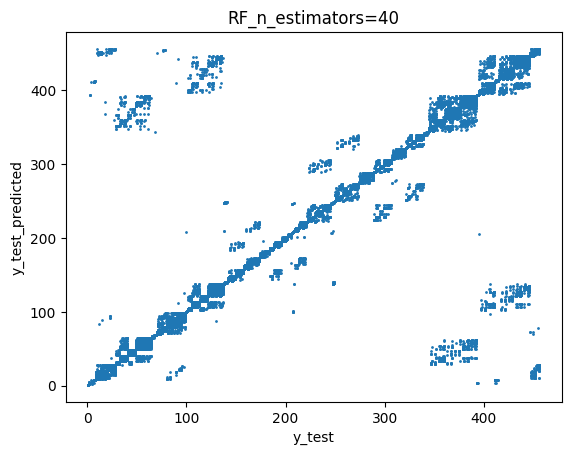

In [36]:
# Plotting the data
plt.scatter(y_test_1D, RF_predict_1D, marker='o', s = 1, label='Data Points')

# Adding labels and title
plt.xlabel('y_test')
plt.ylabel('y_test_predicted')
plt.title('RF_n_estimators=40')

# # Adding a legend
# plt.legend()

# Display the plot
plt.show()

In [37]:
joblib.dump(classifier_RF, 'Step 3_RF_model_conc_normalized_n_estimators=40.joblib', compress=9)

['Step 3_RF_model_conc_normalized_n_estimators=40.joblib']

In [44]:
def generate_predicted_grouping(predictions):
    threshold = 1.0
    index = np.argsort(predictions) + 1
    prob = 0
    grouping = []
    probabilities = []
    for j in index[::-1]:
        prob += predictions[j - 1]
        grouping.append(j)
        probabilities.append(predictions[j - 1])
        if prob >= threshold:
            break
    # print(grouping)
    # print(probabilities)
    return grouping, probabilities

In [39]:
# model = joblib.load("Step 3_RF_model_conc_normalized_n_estimators=40.joblib.joblib")

In [40]:
y_predicted_proba = classifier_RF.predict_proba(X_test)
print(y_predicted_proba)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [45]:
cnt = 0
total_iterations = len(y_predicted_proba)
for idx_proba, i in enumerate(y_predicted_proba):
    # print(idx_proba)
    grouping, probabilities = generate_predicted_grouping(i)
    if y_test_1D[idx_proba] in grouping:
        cnt += 1

percentage = (cnt / total_iterations) * 100
print("Percentage:", percentage)

Percentage: 98.34091849400083
